El método que converge mejor es el de la secante modificada, ya que en sus primeras iteraciones el valor es muy cercano a la raíz verdadera, por tanto al calcular el error relativo porcentual verdadero es el que más rapido se aproxima a 0


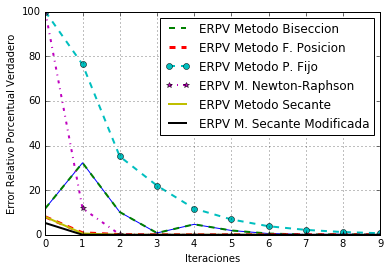

In [18]:
import math
import matplotlib.pyplot as plt
from tabulate import tabulate
%matplotlib inline
#Para ver en ventana aparte grande quitar la linea de arriba (%matplotlib inline)
t,xu,xl,fc1,fc2,tab,vv,ar1=[],1.0,0.0,1,1,[],0.567143,[]
#Bisección
def funcion(num):
    fxb=(math.exp(-num)-num)
    return fxb

for i in range (10):
    xr=(xl+xu)/2
    fc1=funcion(xl)
    fc2=funcion(xr)
    if ((fc1*fc2)<0):
        xu=xr
    if((fc1*fc2)>0):
        xl=xr
    Erpvb=math.fabs(((vv-xr)/(vv))*100)
    ar1.append(Erpvb)
    t.append(i)

#Falsa Posición
xu1,xl1,fc11,fc22,ar2=1.0,0.0,1,1,[]
vv=0.567143
for j in range (10):
    xr1=xu1-((funcion(xu1)*(xl1-xu1))/(funcion(xl1)-(funcion(xu1))))
    fc11=funcion(xl1)
    fc22=funcion(xr1)
    if (fc11*fc22)<0:
        xu1=xr1
    if (fc11*fc22)>0:
        xl1=xr1
    Erpvf=math.fabs(((vv-xr1)/(vv))*100)
    ar2.append(Erpvf)
#Punto Fijo
fun,ar3=0,[]
for k in range (10):
    Erpvp=math.fabs(((vv-fun)/(vv))*100)
    ar3.append(Erpvp)
    fun=math.exp(-fun)

#Newton-Raphson
fun1,ar4=-1,[]
for l in range (10):
    fun1=fun1-((math.exp(-fun1)-fun1)/(-math.exp(-fun1)-1))
    Erpvn=math.fabs(((vv-fun1)/(vv))*100)
    ar4.append(Erpvn)

#Secante   
xmenos1,x0,ar5,t1=0.0,1.0,[],[]

for m in range (7):
    fun2=x0-(((math.exp(-x0)-x0)*(xmenos1-x0)))/((math.exp(-xmenos1)-xmenos1)-(math.exp(-x0)-x0))
    xmenos1=x0
    x0=fun2
    Erpvs=math.fabs(((vv-fun2)/(vv))*100)
    ar5.append(Erpvs)
    t1.append(m)
    
#Secante Modificada
xo,s,ar6=1.0,0.01,[]
k=(xo+(s*xo))
for n in range (10):
    fmas1=xo-((s*xo)*((math.exp(-xo))-xo))/((math.exp(-k)-k)-(math.exp(-xo)-xo))
    xo=fmas1
    k=(xo+(s*xo))
    Erpvsm=math.fabs(((vv-fmas1)/(vv))*100)
    ar6.append(Erpvsm)
#Análisis
print "El método que converge mejor es el de la secante modificada, ya que en sus primeras iteraciones el valor es muy \
cercano a la raíz verdadera, por tanto al calcular el error relativo porcentual verdadero es el que más rapido se aproxima a 0"
plt.plot(t,ar1)
plt.plot (t, ar1, linewidth=2.0, linestyle='--', label='ERPV Metodo Biseccion')
plt.plot(t,ar2, linewidth=3.0, linestyle='--',label='ERPV Metodo F. Posicion')
plt.plot(t,ar3, marker='o', linewidth=2.0,linestyle='--',label='ERPV Metodo P. Fijo')
plt.plot(t,ar4, marker='*',linewidth=2.0 , linestyle='-.',label='ERPV M. Newton-Raphson')
plt.plot(t1,ar5, linewidth=2.0, label='ERPV Metodo Secante')
plt.plot(t,ar6, linewidth=2.0, label='ERPV M. Secante Modificada')
plt.xlabel('Iteraciones')
plt.ylabel('Error Relativo Porcentual Verdadero')
plt.grid(True)
plt.legend()
plt.show()